In [1]:
import pandas as pd
import numpy as np

In [2]:
snacks_sales = pd.read_csv("Snacks_Data.csv")

In [3]:
snacks_sales['Month'] = pd.DatetimeIndex(snacks_sales['Date']).month

In [4]:
Quarter_Mapping = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3, 10:4, 11:4, 12:4}

In [5]:
snacks_sales['Quarter'] = snacks_sales['Month'].map(Quarter_Mapping)

In [6]:
snacks_sales.shape

(1095, 12)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

## Line plots with relplot()

Text(0.5, 1.0, 'line plot')

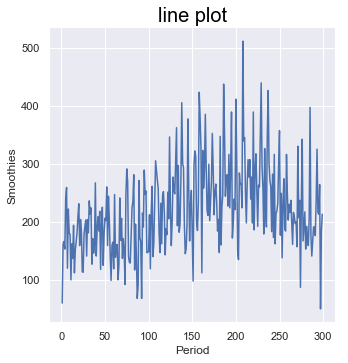

In [8]:
sns.set(style='darkgrid')
sns.relplot(x='Period', y='Smoothies', data=snacks_sales.query('Period < 300'), kind='line')
plt.title('line plot', size=20, color='black')

Text(0.5, 1.0, 'line plot with hue')

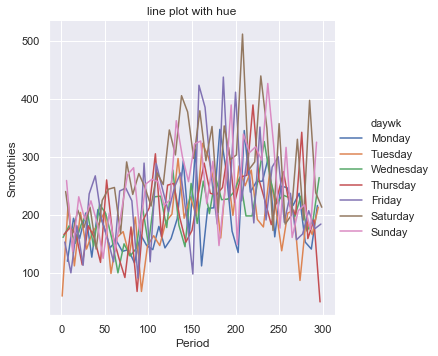

In [49]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.relplot(x='Period', y='Smoothies', hue='daywk', 
            hue_order = day_order, 
            data=snacks_sales.query('Period < 300'), kind='line')

plt.title('line plot with hue')

Text(0.5, 1.0, 'line plot with hue and style')

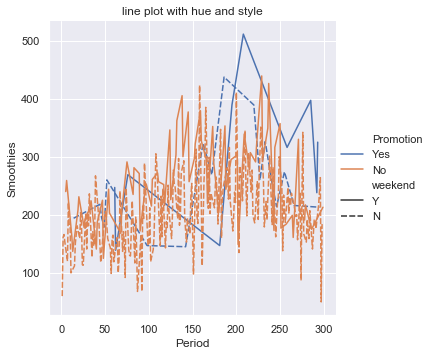

In [42]:
sns.relplot(x='Period', y='Smoothies', hue='Promotion', hue_order=['Yes', 'No'], style='weekend', 
           style_order=['Y', 'N'], kind='line',
           data=snacks_sales.query('Period < 300'))
plt.title('line plot with hue and style')

Text(0.5, 1.0, 'line plot')

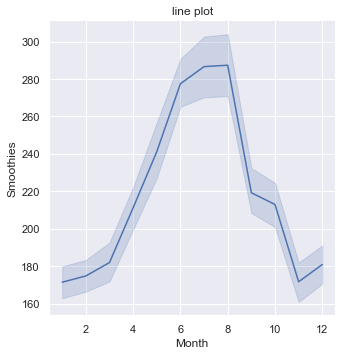

In [51]:
sns.relplot(x='Month', y='Smoothies', data=snacks_sales, kind='line')
plt.title('line plot')

Text(0.5, 1.0, 'line plot with with hue and error bar')

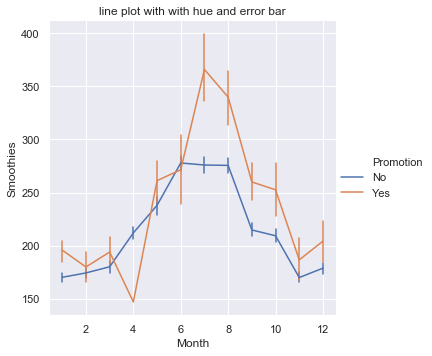

In [52]:
sns.relplot(x='Month', y='Smoothies', hue='Promotion', 
           data=snacks_sales, kind='line',
           err_style='bars', ci=68)
plt.title('line plot with with hue and error bar')

Text(0.5, 1.0, 'line plot with hue and style')

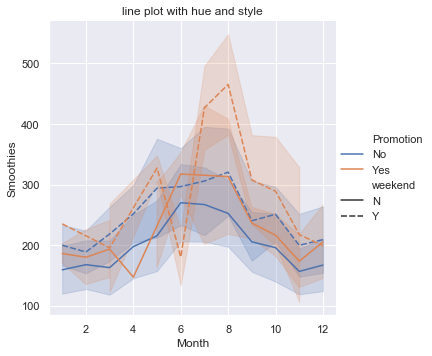

In [53]:
sns.relplot(x='Month', y='Smoothies', hue='Promotion', style='weekend', 
           kind='line', ci='sd', data=snacks_sales)
plt.title('line plot with hue and style')

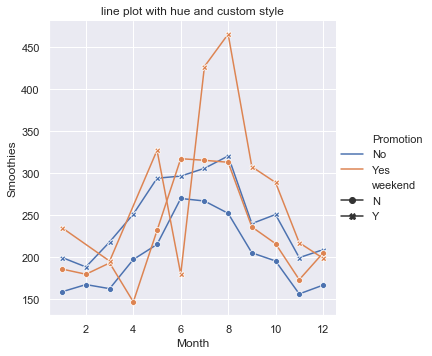

In [54]:
sns.relplot(x='Month', y='Smoothies', hue='Promotion', style='weekend',
           dashes=False, markers=True,
           data=snacks_sales, kind='line', ci=None)
plt.title('line plot with hue and custom style')
plt.show()

### Converting the data set from wide to long format

In [40]:
long_sales = pd.melt(snacks_sales, var_name='Item', value_name='Sales',
                    id_vars=['daywk', 'weekend', 'Date', 'Promotion', 
                             'Period', 'Month', 'Quarter'])
long_sales.shape

(5475, 9)

In [41]:
long_sales.sample(3)

,daywk,weekend,Date,Promotion,Period,Month,Quarter,Item,Sales
767,Saturday,Y,2/7/2017,No,768,2,1,Cakes,110
93,Thursday,N,4/4/2015,No,94,4,2,Cakes,83
4793,Tuesday,N,2/18/2016,No,414,2,1,Coffee,219


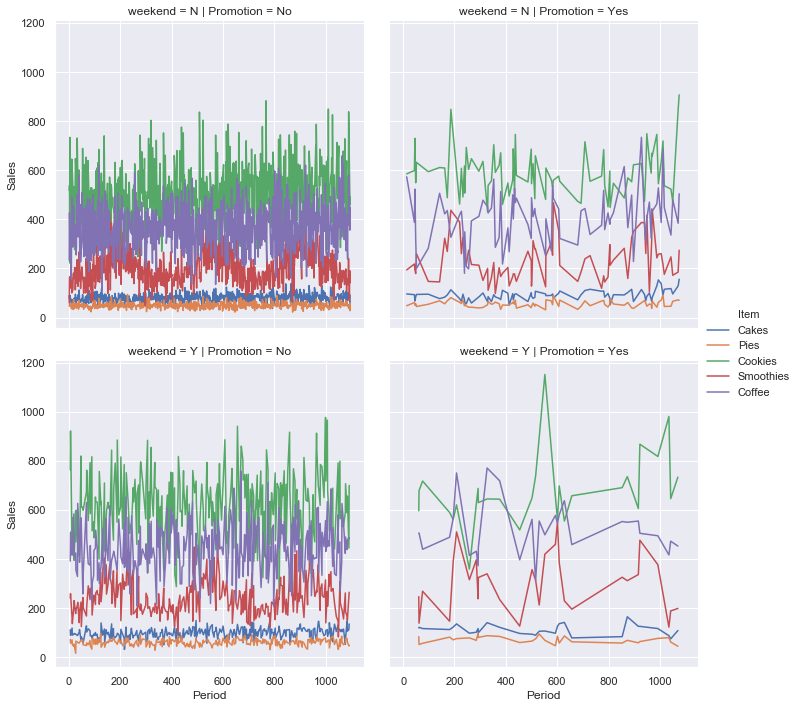

In [42]:
g = sns.relplot(x='Period', y='Sales', data=long_sales, kind='line',
               hue='Item', row='weekend', col='Promotion')

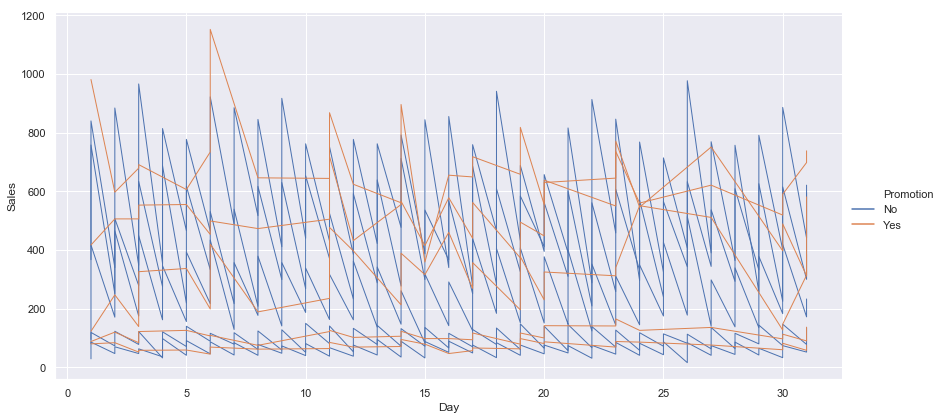

In [43]:
long_sales['Day'] = pd.DatetimeIndex(long_sales['Date']).day
sns.relplot(x='Day', y='Sales', hue='Promotion', 
           data=long_sales.query("weekend =='Y'"), kind='line',
           units="Item", estimator=None, lw=1, height=6, aspect=2)
plt.show()

## Scatter plots with relplot()

Text(0.5, 1.0, 'scatter plot')

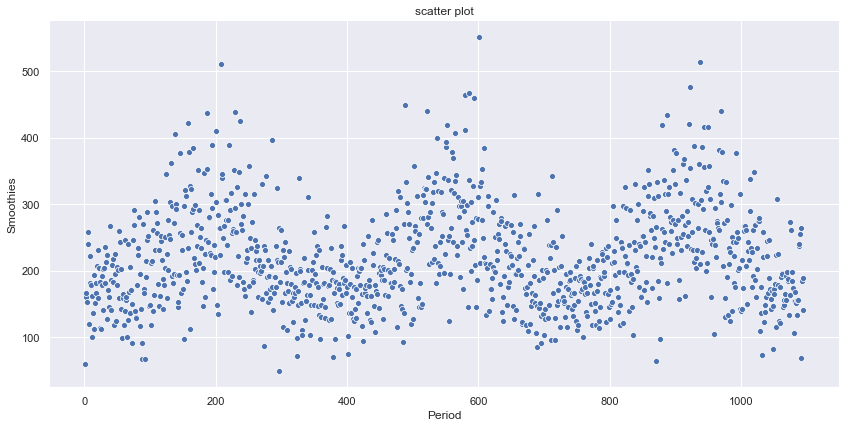

In [22]:
sns.relplot(x='Period', y='Smoothies', data=snacks_sales, 
           kind='scatter', lw=1, height=6, aspect=2)
plt.title('scatter plot')

Text(0.5, 1.0, 'scatter plot with hue')

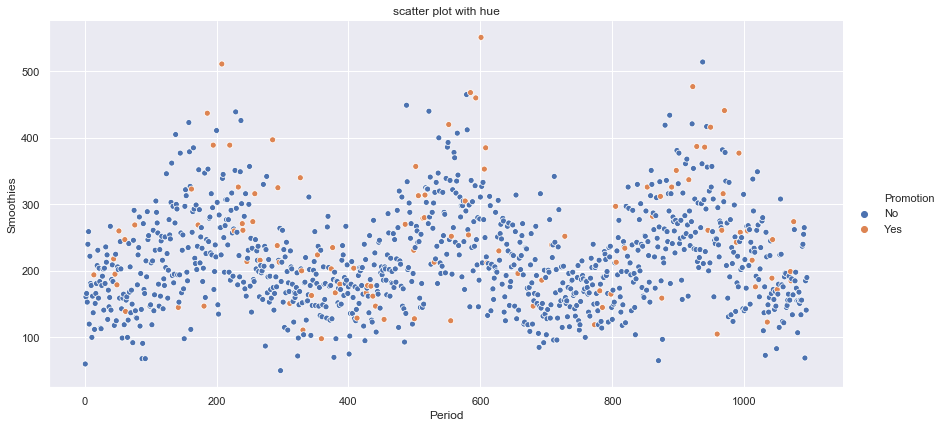

In [25]:
sns.relplot(x='Period', y='Smoothies', hue='Promotion',
           data=snacks_sales, height=6, aspect=2)
plt.title('scatter plot with hue')

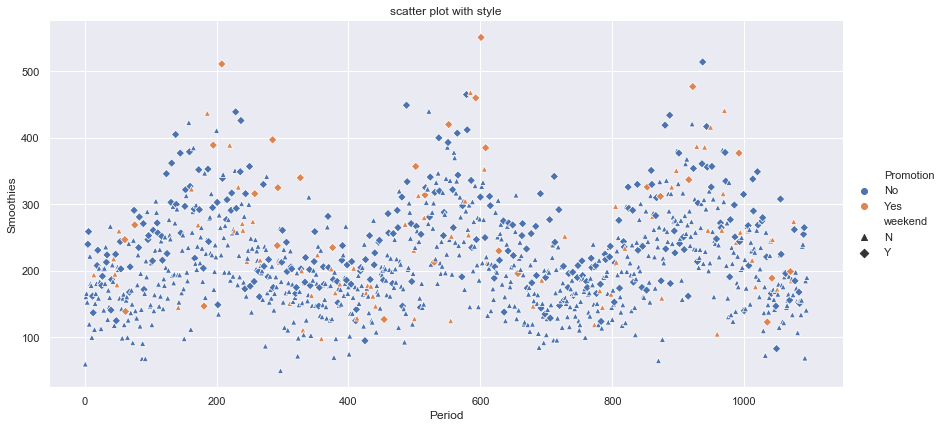

In [27]:
sns.relplot(x='Period', y='Smoothies', hue='Promotion', style='weekend', markers=['^', 'D'],
           data=snacks_sales, height=6, aspect=2)
plt.title('scatter plot with style')
plt.show()

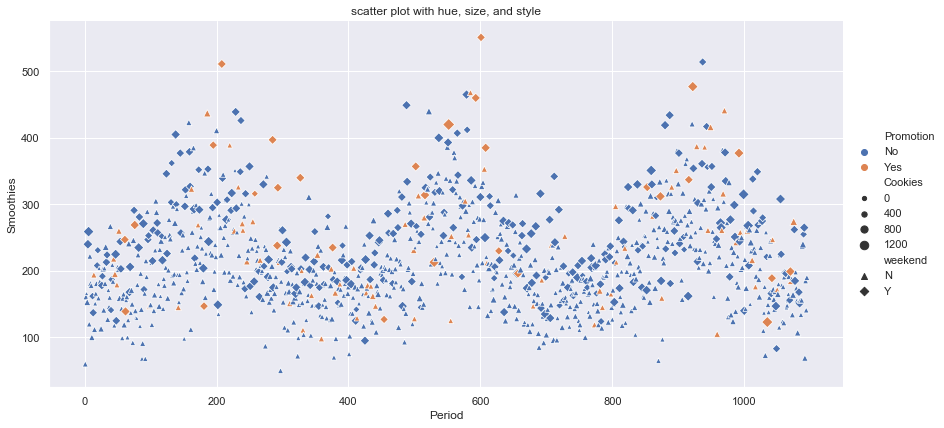

In [29]:
sns.relplot(x='Period', y='Smoothies', hue='Promotion', style='weekend', size='Cookies', markers=['^', 'D'],
            data=snacks_sales, height=6, aspect=2)
plt.title('scatter plot with hue, size, and style')
plt.show()

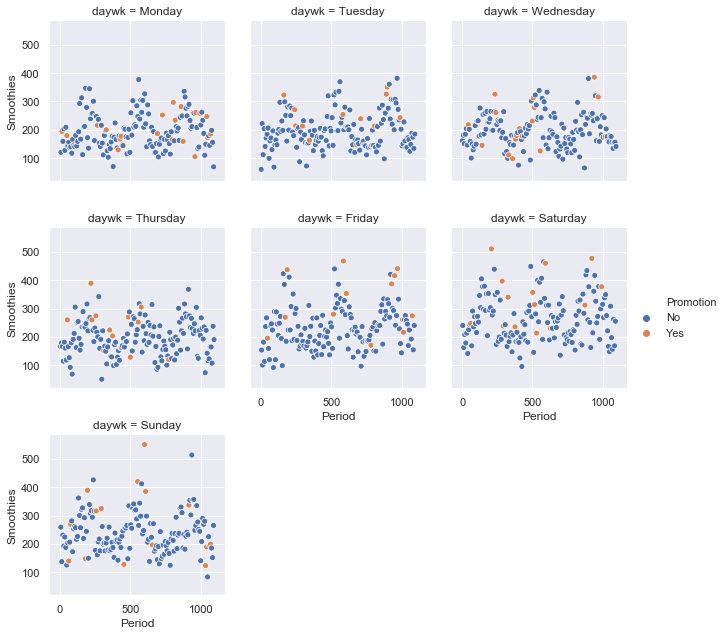

In [30]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.relplot(x='Period', y='Smoothies', hue='Promotion', col='daywk',
           col_wrap=3, col_order=day_order, data=snacks_sales, height=3)

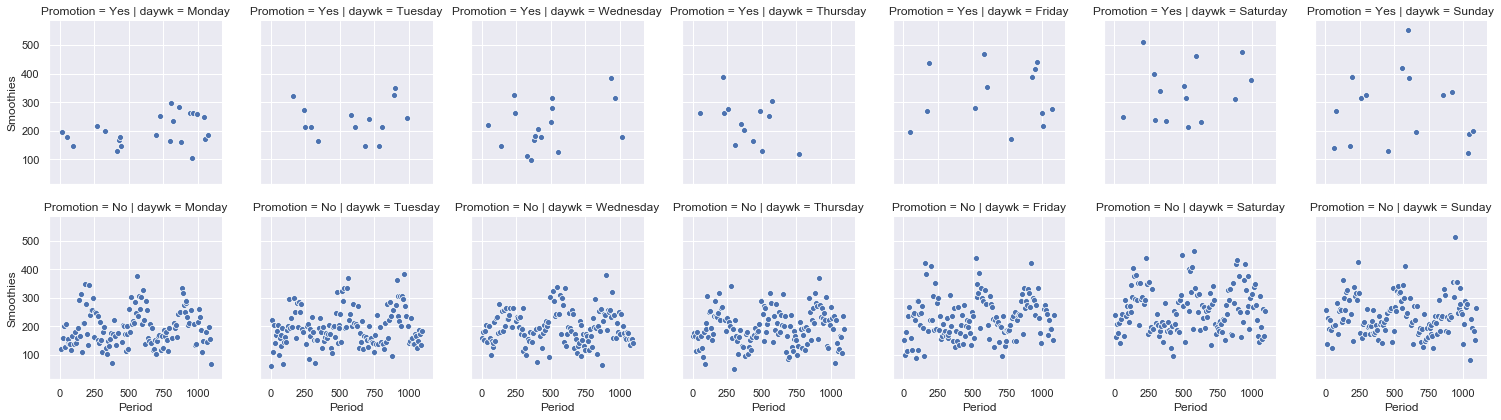

In [33]:
sns.relplot(x='Period', y='Smoothies', col='daywk', 
            col_order=day_order, row='Promotion', row_order=['Yes', 'No'], 
            data=snacks_sales, height=3)
plt.show()

## Strip and swarm plots with catplot()

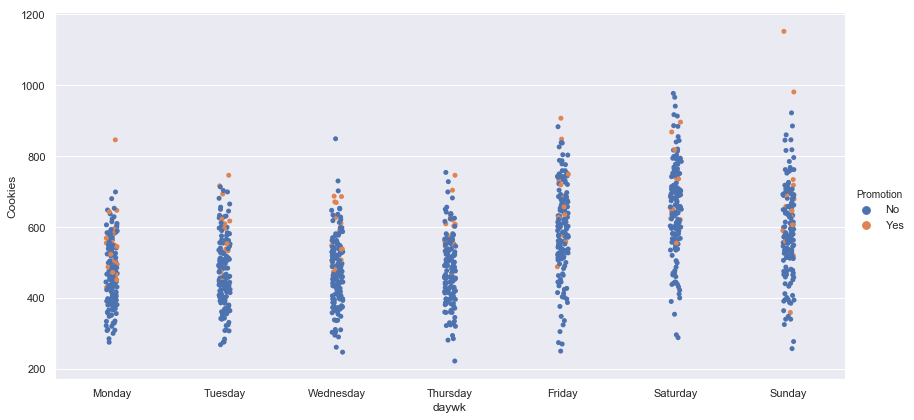

In [38]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot(x='daywk', y='Cookies', data=snacks_sales, hue='Promotion', order=day_order,
           jitter=0.05, height=6, aspect=2, kind='strip')

plt.show()

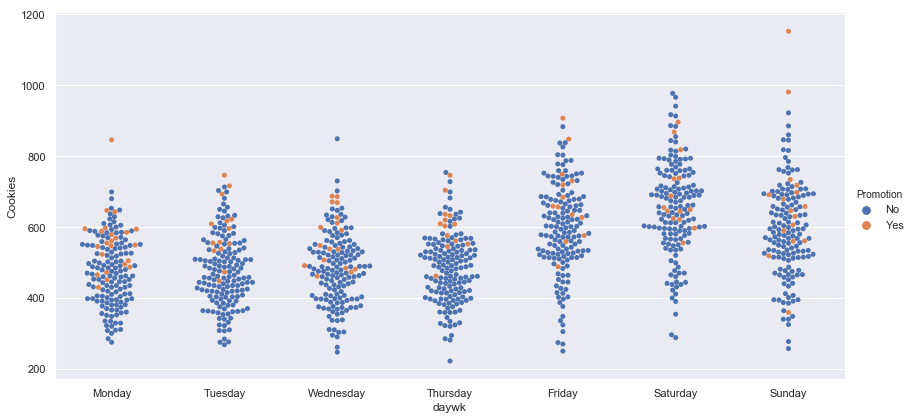

In [39]:
sns.catplot(x='daywk', y='Cookies', data=snacks_sales, order=day_order, hue='Promotion', 
           kind='swarm', height=6, aspect=2)
plt.show()

## Box and boxn plots

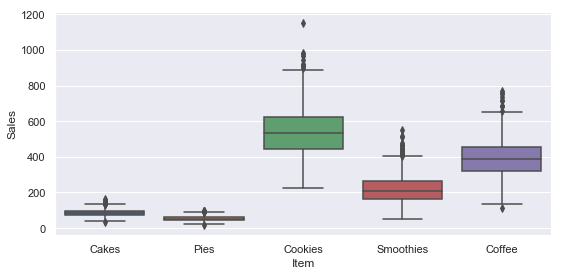

In [50]:
sns.catplot(x='Item', y='Sales', data=long_sales, kind='box', height=4, aspect=2)
plt.show()

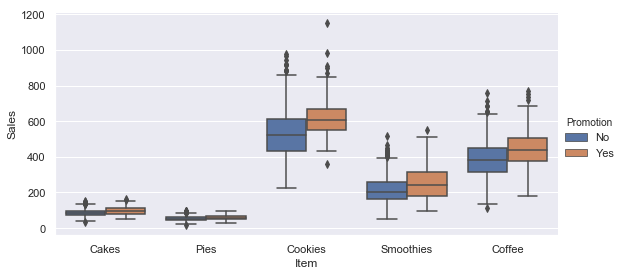

In [54]:
sns.catplot(x='Item', y='Sales', data=long_sales, kind='box', hue='Promotion', height=4, aspect=2)
plt.show()

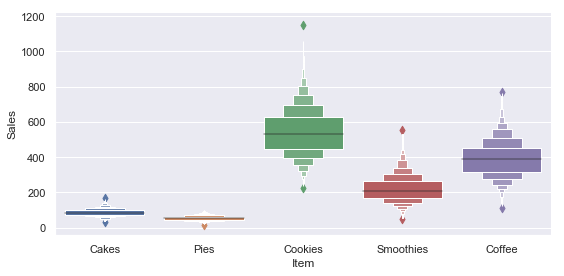

In [57]:
sns.catplot(x='Item', y='Sales', data=long_sales, kind='boxen', height=4, aspect=2)
plt.show()

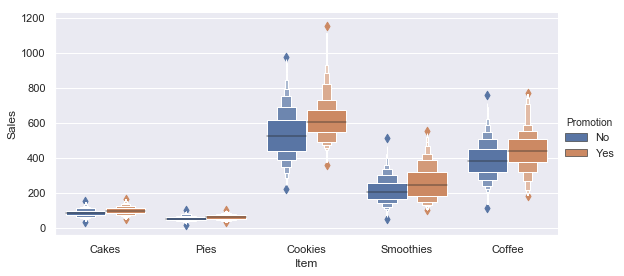

In [65]:
sns.catplot(x='Item', y='Sales', data=long_sales, kind='boxen', hue='Promotion', height=4, aspect=2)
plt.show()

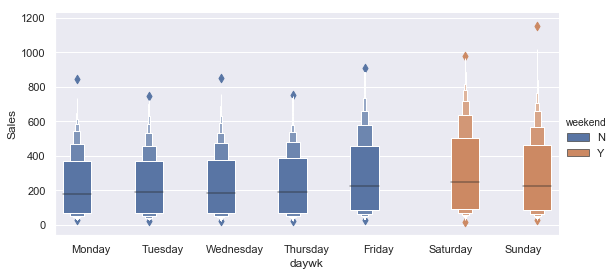

In [66]:
sns.catplot(y='Sales', x='daywk', data=long_sales, kind='boxen', hue='weekend',
           order=day_order, height=4, aspect=2)
plt.show()